# 输入

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from math import sin, cos, sqrt, atan2, radians
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (auc, classification_report, roc_auc_score, accuracy_score,
                             f1_score, log_loss, roc_curve, confusion_matrix, precision_score, recall_score)
import statsmodels.formula.api as smf

np.random.seed(0)

In [3]:
mm_data = pd.read_csv('NCAA_Tourney_2002_2021.csv')
real_data = pd.read_csv('NCAA_Tourney_2022.csv')
mm_data.columns.values

array(['team1_id', 'team1_score', 'team2_id', 'team2_score', 'WLoc',
       'num_ot', 'team1_position', 'team2_position', 'team1_seed',
       'team2_seed', 'strongseed', 'weakseed', 'team1_region',
       'team2_region', 'slot', 'team1_teamname', 'team2_teamname',
       'season', 'host', 'host_lat', 'host_long', 'team1_lat',
       'team1_long', 'team2_lat', 'team2_long', 'team1_coach_id',
       'team1_pt_school_ncaa', 'team1_pt_overall_ncaa',
       'team1_pt_school_s16', 'team1_pt_overall_s16',
       'team1_pt_school_ff', 'team1_pt_overall_ff',
       'team1_pt_career_school_wins', 'team1_pt_career_school_losses',
       'team1_pt_career_overall_wins', 'team1_pt_career_overall_losses',
       'team1_pt_team_season_wins', 'team1_pt_team_season_losses',
       'team1_pt_coach_season_wins', 'team1_pt_coach_season_losses',
       'team2_coach_id', 'team2_pt_school_ncaa', 'team2_pt_overall_ncaa',
       'team2_pt_school_s16', 'team2_pt_overall_s16',
       'team2_pt_school_ff', 'team2

In [4]:
mm_data = pd.read_csv('NCAA_Tourney_2002_2021.csv').query("season<2021").reset_index(drop=True)

In [5]:
list(mm_data.columns)

['team1_id',
 'team1_score',
 'team2_id',
 'team2_score',
 'WLoc',
 'num_ot',
 'team1_position',
 'team2_position',
 'team1_seed',
 'team2_seed',
 'strongseed',
 'weakseed',
 'team1_region',
 'team2_region',
 'slot',
 'team1_teamname',
 'team2_teamname',
 'season',
 'host',
 'host_lat',
 'host_long',
 'team1_lat',
 'team1_long',
 'team2_lat',
 'team2_long',
 'team1_coach_id',
 'team1_pt_school_ncaa',
 'team1_pt_overall_ncaa',
 'team1_pt_school_s16',
 'team1_pt_overall_s16',
 'team1_pt_school_ff',
 'team1_pt_overall_ff',
 'team1_pt_career_school_wins',
 'team1_pt_career_school_losses',
 'team1_pt_career_overall_wins',
 'team1_pt_career_overall_losses',
 'team1_pt_team_season_wins',
 'team1_pt_team_season_losses',
 'team1_pt_coach_season_wins',
 'team1_pt_coach_season_losses',
 'team2_coach_id',
 'team2_pt_school_ncaa',
 'team2_pt_overall_ncaa',
 'team2_pt_school_s16',
 'team2_pt_overall_s16',
 'team2_pt_school_ff',
 'team2_pt_overall_ff',
 'team2_pt_career_school_wins',
 'team2_pt_caree

In [6]:
[x for x in mm_data.columns if 'name' in x]  

['team1_teamname', 'team2_teamname']

# Pythag College Basketball
E(W%) = points scored^11.5 / (points scored^11.5+points allowed^11.5)

In [7]:
mm_data['exp_win1'] = (mm_data['team1_adjoe']**11.5)/ ((mm_data['team1_adjde']**11.5)+(mm_data['team1_adjoe']**11.5))
mm_data['exp_win2'] = (mm_data['team2_adjoe']**11.5)/ ((mm_data['team2_adjde']**11.5)+(mm_data['team2_adjoe']**11.5))


# Log Odds
P(W) = (A - A B) / (A + B - 2A*B)

In [8]:
mm_data['team1_log5'] = (mm_data['exp_win1'] - (mm_data['exp_win1']*mm_data['exp_win2']))/ (mm_data['exp_win1']+mm_data['exp_win2']-(2*mm_data['exp_win1']*mm_data['exp_win2']))


In [9]:
(mm_data
 [['team1_adjoe','team1_teamname','season','team2_teamname','team1_adjde','exp_win1','exp_win2','team1_log5']]
 .sort_values("team1_log5", ascending=False).head())

,team1_adjoe,team1_teamname,season,team2_teamname,team1_adjde,exp_win1,exp_win2,team1_log5
921,119.7250,Kentucky,2015,Hampton,85.8155,0.978741,0.312700,0.990214
462,116.1109,UCLA,2008,MS Valley St,89.3351,0.953236,0.197019,0.988106
199,117.6452,Duke,2004,Alabama St,89.6445,0.957950,0.246514,0.985842
70,118.5999,Duke,2002,Winthrop,87.7504,0.969660,0.367453,0.982148
25,123.6930,Virginia,2019,Gardner Webb,88.0404,0.980355,0.480146,0.981828


# Seed Diff

In [10]:
mm_data['seed_diff'] = mm_data['team1_seed'] - mm_data['team2_seed']
mm_data[['game_id','exp_win1','exp_win2','team2_score',
         'team1_score','team1_log5','team1_id','team2_id','team1_seed','team2_seed','seed_diff']].head()

,game_id,exp_win1,exp_win2,team2_score,team1_score,team1_log5,team1_id,team2_id,team1_seed,team2_seed,seed_diff
0,2019-1192-1341,0.389061,0.382990,76,82,0.506403,1192,1341,16,16,0
1,2019-1125-1396,0.800207,0.738939,70,81,0.585922,1125,1396,11,11,0
2,2019-1295-1300,0.415885,0.208404,74,78,0.730051,1295,1300,16,16,0
3,2019-1113-1385,0.774944,0.721882,65,74,0.570190,1113,1385,11,11,0
4,2019-1278-1257,0.833312,0.913200,76,86,0.322116,1278,1257,10,7,3


# NET Efficiency

Net efficiency = team1_oe - team2_oe

In [11]:
#team1_net_eff
mm_data['team1_net_eff'] = mm_data['team1_oe'] - mm_data['team2_oe']
mm_data[0:100]

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,team2_oe,team2_adjoe,team2_de,team2_adjde,game_id,exp_win1,exp_win2,team1_log5,seed_diff,team1_net_eff
0,1192,82,1341,76,N,0,X16a,X16b,16,16,...,103.1200,101.6550,99.7542,105.9590,2019-1192-1341,0.389061,0.382990,0.506403,0,5.2500
1,1125,81,1396,70,N,0,W11a,W11b,11,11,...,105.3060,108.9910,100.1860,99.5630,2019-1125-1396,0.800207,0.738939,0.585922,0,11.0870
2,1295,78,1300,74,N,0,W16a,W16b,16,16,...,100.5020,96.7551,100.7490,108.6610,2019-1295-1300,0.415885,0.208404,0.730051,0,7.6960
3,1113,74,1385,65,N,0,X11a,X11b,11,11,...,105.9880,109.7820,102.5140,101.0440,2019-1113-1385,0.774944,0.721882,0.570190,0,0.4380
4,1278,86,1257,76,N,0,W10,W07,10,7,...,107.2430,113.5030,97.6744,92.4983,2019-1278-1257,0.833312,0.913200,0.322116,3,-3.9450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1356,76,1403,68,N,0,W11,W06,11,6,...,109.0757,112.4064,97.7252,96.9711,2002-1356-1403,0.775902,0.845357,0.387769,5,-1.9833
96,1400,70,1130,57,N,0,X06,X11,6,11,...,103.7066,107.0112,99.2527,97.6867,2002-1400-1130,0.822470,0.740474,0.618866,-5,6.1933
97,1417,80,1279,58,N,0,Z08,Z09,8,9,...,107.7291,112.3212,95.6265,94.8577,2002-1417-1279,0.824566,0.874717,0.402339,-1,-1.4851
98,1458,80,1385,70,N,0,W08,W09,8,9,...,97.0139,99.3518,94.3765,91.7203,2002-1458-1385,0.796964,0.714862,0.610236,-1,6.0152


# Split Data

In [12]:
mm_data.dropna(subset=['team1_log5'], inplace=True)

In [13]:
mm_data['team1_win'] = (mm_data['team1_score']>mm_data['team2_score']).astype(int)

In [14]:
# Modified
mm_data_1_all = mm_data.sample(frac=.5, random_state=4)
mm_data_2_all = mm_data[~mm_data.index.isin(mm_data_1_all.index)].reset_index(drop=True)
mm_data_1_all = mm_data_1_all.reset_index(drop=True)
mm_data_2_all[1:100]

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,team2_adjoe,team2_de,team2_adjde,game_id,exp_win1,exp_win2,team1_log5,seed_diff,team1_net_eff,team1_win
1,1125,81,1396,70,N,0,W11a,W11b,11,11,...,108.9910,100.1860,99.5630,2019-1125-1396,0.800207,0.738939,0.585922,0,11.0870,1
2,1113,74,1385,65,N,0,X11a,X11b,11,11,...,109.7820,102.5140,101.0440,2019-1113-1385,0.774944,0.721882,0.570190,0,0.4380,1
3,1278,86,1257,76,N,0,W10,W07,10,7,...,113.5030,97.6744,92.4983,2019-1278-1257,0.833312,0.913200,0.322116,3,-3.9450,1
4,1261,79,1463,74,N,0,W03,W14,3,14,...,110.5520,99.2049,102.2790,2019-1261-1463,0.903836,0.709816,0.793493,-11,3.5190,1
5,1120,78,1308,77,N,0,Y05,Y12,5,12,...,112.7330,95.2348,99.1319,2019-1120-1308,0.913556,0.814356,0.706674,-7,-0.3070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1393,79,1120,78,N,0,W03,W10,3,10,...,104.4508,96.6885,93.7798,2003-1393-1120,0.882229,0.775445,0.684469,-7,7.7439,1
96,1400,82,1163,78,N,0,X01,X05,1,5,...,110.5880,97.1758,93.6982,2003-1400-1163,0.916251,0.870561,0.619290,-4,2.7748,1
97,1393,63,1328,47,N,0,W03,W01,3,1,...,110.1590,92.3056,89.4483,2003-1393-1328,0.882229,0.916448,0.405806,2,1.6453,1
98,1242,94,1266,61,N,0,Z02,Y03,2,3,...,116.5789,99.1207,97.0902,2003-1242-1266,0.937882,0.891259,0.648152,-1,-5.2617,1


In [15]:
# Modified
mm_data_2_all['team1_win'] = 0
mm_data_2_all['team1_log5'] = 1-mm_data_2_all['team1_log5']
mm_data_2_all['game_id'] = (mm_data_2_all['game_id'].str.split('-', expand=True)[0] 
                           + '-' + mm_data_2_all['game_id'].str.split('-', expand=True)[2] 
                           + '-' + mm_data_2_all['game_id'].str.split('-', expand=True)[1]
                           ) 
mm_data_2_all['seed_diff'] = mm_data_2_all['seed_diff']*-1
mm_data_2_all['team1_net_eff'] = mm_data_2_all['team1_net_eff']*-1
mm_data_2_all.columns = ['team2_id', 'team2_score', 'team1_id', 'team1_score', 'WLoc',
       'num_ot', 'team2_position', 'team1_position', 'team2_seed',
       'team1_seed', 'strongseed', 'weakseed', 'team2_region',
       'team1_region', 'slot', 'team2_teamname', 'team1_teamname',
       'season', 'host', 'host_lat', 'host_long', 'team2_lat',
       'team2_long', 'team1_lat', 'team1_long', 'team2_coach_id',
       'team2_pt_school_ncaa', 'team2_pt_overall_ncaa',
       'team2_pt_school_s16', 'team2_pt_overall_s16',
       'team2_pt_school_ff', 'team2_pt_overall_ff',
       'team2_pt_career_school_wins', 'team2_pt_career_school_losses',
       'team2_pt_career_overall_wins', 'team2_pt_career_overall_losses',
       'team2_pt_team_season_wins', 'team2_pt_team_season_losses',
       'team2_pt_coach_season_wins', 'team2_pt_coach_season_losses',
       'team1_coach_id', 'team1_pt_school_ncaa', 'team1_pt_overall_ncaa',
       'team1_pt_school_s16', 'team1_pt_overall_s16',
       'team1_pt_school_ff', 'team1_pt_overall_ff',
       'team1_pt_career_school_wins', 'team1_pt_career_school_losses',
       'team1_pt_career_overall_wins', 'team1_pt_career_overall_losses',
       'team1_pt_team_season_wins', 'team1_pt_team_season_losses',
       'team1_pt_coach_season_wins', 'team1_pt_coach_season_losses',
       'team2_ap_final', 'team2_ap_preseason',
       'team2_coaches_before_final', 'team2_coaches_preseason',
       'team1_ap_final', 'team1_ap_preseason',
       'team1_coaches_before_final', 'team1_coaches_preseason',
       'team2_fg2pct', 'team2_fg3pct', 'team2_ftpct', 'team2_blockpct',
       'team2_oppfg2pct', 'team2_oppfg3pct', 'team2_oppftpct',
       'team2_oppblockpct', 'team2_f3grate', 'team2_oppf3grate',
       'team2_arate', 'team2_opparate', 'team2_stlrate',
       'team2_oppstlrate', 'team1_fg2pct', 'team1_fg3pct', 'team1_ftpct',
       'team1_blockpct', 'team1_oppfg2pct', 'team1_oppfg3pct',
       'team1_oppftpct', 'team1_oppblockpct', 'team1_f3grate',
       'team1_oppf3grate', 'team1_arate', 'team1_opparate',
       'team1_stlrate', 'team1_oppstlrate', 'team2_tempo',
       'team2_adjtempo', 'team2_oe', 'team2_adjoe', 'team2_de',
       'team2_adjde', 'team1_tempo', 'team1_adjtempo', 'team1_oe',
       'team1_adjoe', 'team1_de', 'team1_adjde', 'game_id', 'exp_win2',
       'exp_win1', 'team1_log5', 'seed_diff','team1_net_eff', 'team1_win']

In [16]:
mm_data_2_all['team1_net_eff']

0      -5.250
1     -11.087
2      -0.438
3       3.945
4      -3.519
        ...  
584     0.900
585    -0.100
586    -6.500
587    -4.600
588   -11.500
Name: team1_net_eff, Length: 589, dtype: float64

In [17]:
# Modified
mm_train_all = pd.concat([mm_data_2_all, mm_data_1_all]).reset_index(drop=True)

In [18]:
mm_train_all[1:100]

,team2_id,team2_score,team1_id,team1_score,WLoc,num_ot,team2_position,team1_position,team2_seed,team1_seed,...,team1_adjoe,team1_de,team1_adjde,game_id,exp_win2,exp_win1,team1_log5,seed_diff,team1_net_eff,team1_win
1,1125,81,1396,70,N,0,W11a,W11b,11,11,...,108.9910,100.1860,99.5630,2019-1396-1125,0.800207,0.738939,0.414078,0,-11.0870,0
2,1113,74,1385,65,N,0,X11a,X11b,11,11,...,109.7820,102.5140,101.0440,2019-1385-1113,0.774944,0.721882,0.429810,0,-0.4380,0
3,1278,86,1257,76,N,0,W10,W07,10,7,...,113.5030,97.6744,92.4983,2019-1257-1278,0.833312,0.913200,0.677884,-3,3.9450,0
4,1261,79,1463,74,N,0,W03,W14,3,14,...,110.5520,99.2049,102.2790,2019-1463-1261,0.903836,0.709816,0.206507,11,-3.5190,0
5,1120,78,1308,77,N,0,Y05,Y12,5,12,...,112.7330,95.2348,99.1319,2019-1308-1120,0.913556,0.814356,0.293326,7,0.3070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1393,79,1120,78,N,0,W03,W10,3,10,...,104.4508,96.6885,93.7798,2003-1120-1393,0.882229,0.775445,0.315531,7,-7.7439,0
96,1400,82,1163,78,N,0,X01,X05,1,5,...,110.5880,97.1758,93.6982,2003-1163-1400,0.916251,0.870561,0.380710,4,-2.7748,0
97,1393,63,1328,47,N,0,W03,W01,3,1,...,110.1590,92.3056,89.4483,2003-1328-1393,0.882229,0.916448,0.594194,-2,-1.6453,0
98,1242,94,1266,61,N,0,Z02,Y03,2,3,...,116.5789,99.1207,97.0902,2003-1266-1242,0.937882,0.891259,0.351848,1,5.2617,0


In [19]:
mm_train_all.to_csv('New_training_data.csv', index = False)


In [20]:
# Modified
train, test = train_test_split(mm_train_all, train_size=.7)

In [21]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [22]:
train

,team2_id,team2_score,team1_id,team1_score,WLoc,num_ot,team2_position,team1_position,team2_seed,team1_seed,...,team1_adjoe,team1_de,team1_adjde,game_id,exp_win2,exp_win1,team1_log5,seed_diff,team1_net_eff,team1_win
0,1429,53,1112,66,N,0,X14,X03,14,3,...,114.0151,97.7107,95.3458,2005-1112-1429,0.885899,0.886596,0.501729,-11,-5.3253,1
1,1163,77,1437,65,N,0,W07,W02,7,2,...,115.8448,96.7318,93.7249,2014-1437-1163,0.868820,0.919584,0.633239,-5,5.9136,0
2,1277,76,1400,85,N,0,X07,X01,7,1,...,118.7559,96.9119,96.4505,2003-1400-1277,0.861114,0.916251,0.638276,-6,8.3537,1
3,1257,69,1401,72,N,0,X06,X03,6,3,...,116.8243,89.4533,92.5218,2007-1401-1257,0.888784,0.935963,0.646509,-3,7.7127,1
4,1285,55,1276,74,N,0,X15,X02,15,2,...,115.7160,89.2552,86.0482,2019-1276-1285,0.595094,0.967912,0.953540,-13,-3.2660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1323,71,1112,88,N,0,Z05,Z01,5,1,...,114.4555,91.6550,90.2006,2003-1112-1323,0.861791,0.939273,0.712689,-4,0.6996,1
821,1300,74,1295,78,N,0,W16b,W16a,16,16,...,106.6750,110.0540,109.8730,2019-1295-1300,0.208404,0.415885,0.730051,0,7.6960,1
822,1173,51,1393,70,N,0,X07,X10,7,10,...,110.4020,99.7255,94.5622,2016-1393-1173,0.824083,0.855822,0.558913,3,1.3610,1
823,1199,67,1281,54,N,0,Z09,Z08,9,8,...,108.1000,97.8000,100.8000,2018-1281-1199,0.734879,0.690843,0.446343,-1,-2.5000,0


# Initial Check = EDA 
自变量分析：多重共线性

In [23]:
train.corr()

,team2_id,team2_score,team1_id,team1_score,num_ot,team2_seed,team1_seed,strongseed,weakseed,season,...,team1_oe,team1_adjoe,team1_de,team1_adjde,exp_win2,exp_win1,team1_log5,seed_diff,team1_net_eff,team1_win
team2_id,1.000000,-0.012376,-0.062595,-0.030488,0.054502,0.031616,0.016020,0.065966,0.005824,0.027280,...,-0.005849,0.009463,0.054458,0.032609,0.012092,-0.009343,0.008228,-0.009962,0.029412,0.007648
team2_score,-0.012376,1.000000,-0.044459,0.264187,0.179641,-0.367707,0.237774,-0.045827,-0.122326,-0.016237,...,-0.072298,-0.118090,0.197939,0.262809,0.316024,-0.249360,-0.383134,0.379211,-0.262934,-0.459037
team1_id,-0.062595,-0.044459,1.000000,-0.043903,-0.012225,-0.005408,0.009335,0.027010,-0.016030,-0.016780,...,-0.057689,-0.040177,-0.046538,-0.047111,0.000826,0.020223,-0.005661,0.009202,-0.045379,0.006210
team1_score,-0.030488,0.264187,-0.043903,1.000000,0.220754,0.229862,-0.315927,-0.063202,-0.048314,-0.029496,...,0.249887,0.316353,-0.102802,-0.153897,-0.226263,0.277680,0.370081,-0.340935,0.233465,0.509271
num_ot,0.054502,0.179641,-0.012225,0.220754,1.000000,0.024719,-0.050079,0.043090,-0.061798,-0.029751,...,0.007023,0.030758,0.009755,-0.005549,-0.015446,0.033599,0.044163,-0.046664,0.019167,0.070530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exp_win1,-0.009343,-0.249360,0.020223,0.277680,0.033599,0.162698,-0.810570,-0.351010,-0.484154,0.024260,...,0.505343,0.715965,-0.469380,-0.725360,0.004435,1.000000,0.631318,-0.605799,0.423148,0.344623
team1_log5,0.008228,-0.383134,-0.005661,0.370081,0.044163,0.741303,-0.710161,-0.004490,0.051789,0.013117,...,0.369914,0.524538,-0.393566,-0.541080,-0.671430,0.631318,1.000000,-0.907819,0.618895,0.539508
seed_diff,-0.009962,0.379211,0.009202,-0.340935,-0.046664,-0.802685,0.796359,0.017635,-0.033921,-0.024741,...,-0.346680,-0.505186,0.345792,0.490656,0.630306,-0.605799,-0.907819,1.000000,-0.563405,-0.505244
team1_net_eff,0.029412,-0.262934,-0.045379,0.233465,0.019167,0.452181,-0.448729,-0.028646,0.033187,-0.007507,...,0.682909,0.657040,-0.001161,-0.045190,-0.440101,0.423148,0.618895,-0.563405,1.000000,0.344412


In [24]:
#test
def get_var_no_colinear(cutoff, df):
    corr_high = df.corr().applymap(lambda x: np.nan if x>cutoff else x).isnull()
    col_all = corr_high.columns.tolist()
    del_col = []
    i = 0
    while i < len(col_all)-1:
        ex_index = corr_high.iloc[:,i][i+1:].index[np.where(corr_high.iloc[:,i][i+1:])].tolist()
        for var in ex_index:
            col_all.remove(var)
        corr_high = corr_high.loc[col_all, col_all]
        i += 1
    return col_all


In [25]:
x = get_var_no_colinear(0.2,train)


In [26]:
x

['team2_id',
 'team2_score',
 'team1_id',
 'num_ot',
 'team2_seed',
 'season',
 'host_lat',
 'host_long',
 'team2_lat',
 'team1_lat',
 'team2_pt_school_ncaa',
 'team2_pt_team_season_wins',
 'team1_pt_school_ncaa',
 'team1_pt_team_season_wins',
 'team1_pt_coach_season_losses',
 'team2_fg3pct',
 'team2_oppfg3pct',
 'team2_oppblockpct',
 'team2_opparate',
 'team1_fg3pct',
 'team1_arate',
 'team1_stlrate',
 'team1_oppstlrate']

<AxesSubplot:>

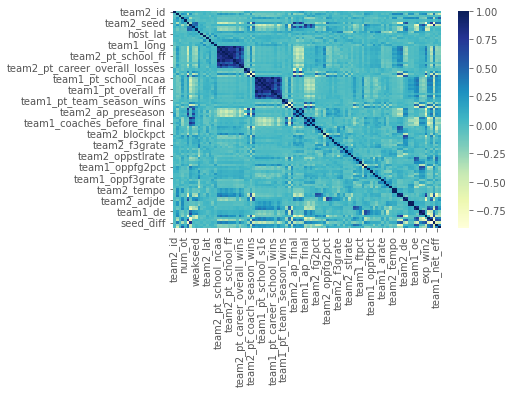

In [27]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, cmap="YlGnBu")

[Text(0.5, 0, 'team2_id'),
 Text(4.5, 0, 'num_ot'),
 Text(8.5, 0, 'weakseed'),
 Text(12.5, 0, 'team2_lat'),
 Text(16.5, 0, 'team2_pt_school_ncaa'),
 Text(20.5, 0, 'team2_pt_school_ff'),
 Text(24.5, 0, 'team2_pt_career_overall_wins'),
 Text(28.5, 0, 'team2_pt_coach_season_wins'),
 Text(32.5, 0, 'team1_pt_school_s16'),
 Text(36.5, 0, 'team1_pt_career_school_wins'),
 Text(40.5, 0, 'team1_pt_team_season_wins'),
 Text(44.5, 0, 'team2_ap_final'),
 Text(48.5, 0, 'team1_ap_final'),
 Text(52.5, 0, 'team2_fg2pct'),
 Text(56.5, 0, 'team2_oppfg2pct'),
 Text(60.5, 0, 'team2_f3grate'),
 Text(64.5, 0, 'team2_stlrate'),
 Text(68.5, 0, 'team1_ftpct'),
 Text(72.5, 0, 'team1_oppftpct'),
 Text(76.5, 0, 'team1_arate'),
 Text(80.5, 0, 'team2_tempo'),
 Text(84.5, 0, 'team2_de'),
 Text(88.5, 0, 'team1_oe'),
 Text(92.5, 0, 'exp_win2'),
 Text(96.5, 0, 'team1_net_eff')]

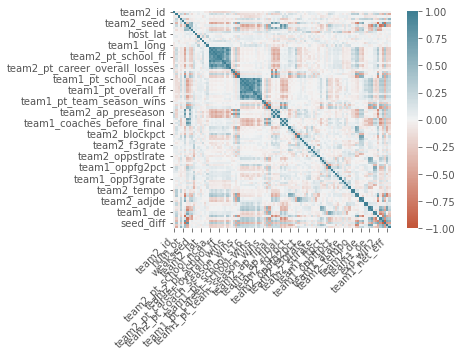

In [28]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [29]:
flat = corr.to_numpy().flatten()
flat = np.unique(flat)
abs_flat = abs(flat)
abs_flat.sort()
abs_flat = abs_flat[:10]
abs_flat

array([8.49343754e-06, 7.39738278e-05, 9.09519423e-05, 1.06955622e-04,
       1.81392327e-04, 1.98110474e-04, 1.99178038e-04, 2.29185742e-04,
       2.52106569e-04, 2.63497431e-04])

In [30]:
result = np.where(abs(corr).to_numpy() == abs_flat)
# indices = np.array(result)
# print(indices)
result

C:\Users\70727\AppData\Local\Temp/ipykernel_23576/2450190860.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  result = np.where(abs(corr).to_numpy() == abs_flat)


(array([], dtype=int64),)

In [31]:


#team2_score team1_win
#team1_win  team1_score
#team1_log5 team1_score 



In [32]:
train.groupby('team1_win')['team1_log5'].mean()

team1_win
0    0.377558
1    0.634047
Name: team1_log5, dtype: float64

In [33]:
train.groupby('team1_win')['seed_diff'].mean()

team1_win
0    3.534279
1   -3.995025
Name: seed_diff, dtype: float64

In [34]:
train.groupby('team1_win')['team1_net_eff'].mean()

team1_win
0   -2.443449
1    2.425526
Name: team1_net_eff, dtype: float64

In [35]:
#train.groupby('team1_win')['diff_dist'].mean()

# Train Log5

In [36]:
logit = LogisticRegression()
logit.fit(X=train[['team1_log5']], y=train['team1_win'])

LogisticRegression()

In [37]:
seed_smlogit = smf.logit("team1_win ~ team1_log5", train).fit()
seed_smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.527059
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  825
Model:                          Logit   Df Residuals:                      823
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.2393
Time:                        22:40:18   Log-Likelihood:                -434.82
converged:                       True   LL-Null:                       -571.58
Covariance Type:            nonrobust   LLR p-value:                 1.949e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0811      0.239    -12.867      0.000      -3.550      -2.612
team1_log5     6.0056      0.445     13.495      0.000       5.133       6.878
==============================================================================
"""

In [38]:
test['prob'] = logit.predict_proba(test[['team1_log5']])[:,1]
test['prediction'] = logit.predict(test[['team1_log5']])

In [39]:
test[['game_id','team1_log5','team1_win','prob','prediction']].head()

,game_id,team1_log5,team1_win,prob,prediction
0,2006-1214-1284,0.296584,0,0.247969,0
1,2010-1165-1458,0.231415,1,0.191352,0
2,2013-1276-1257,0.262321,0,0.216886,0
3,2012-1233-1140,0.505581,0,0.488635,0
4,2013-1196-1195,0.941652,1,0.897942,1


In [40]:
test.groupby('team1_win')['prob'].mean()

team1_win
0    0.374087
1    0.596920
Name: prob, dtype: float64

<AxesSubplot:xlabel='prob', ylabel='team1_log5'>

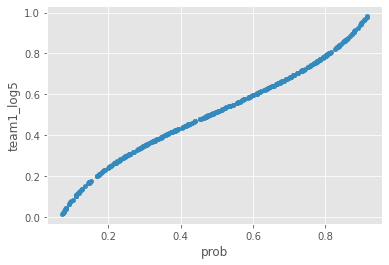

In [41]:
test.plot(kind='scatter', x='prob',y='team1_log5')

In [42]:
confusion_matrix(test['team1_win'], test['prediction'])

array([[120,  46],
       [ 66, 122]], dtype=int64)

In [43]:
accuracy_score(test['team1_win'], test['prediction'],)

0.6836158192090396

In [44]:
precision_score(test['team1_win'], test['prediction'])

0.7261904761904762

In [45]:
recall_score(test['team1_win'], test['prediction'])

0.648936170212766

In [46]:
f1_score(test['team1_win'], test['prediction'])

0.6853932584269663

In [47]:
log_loss(test['team1_win'].values, test['prob'].values, labels=[0,1])

0.5794851418548678

In [48]:
def plot_roc(fpr, tpr, roc_auc):
    """Plots the ROC curve for the win probability model along with
    the AUC.
    """
    fig, ax = plt.subplots()
    ax.set(xlim=[0, 1], ylim=[0, 1], xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.legend(loc='lower right')

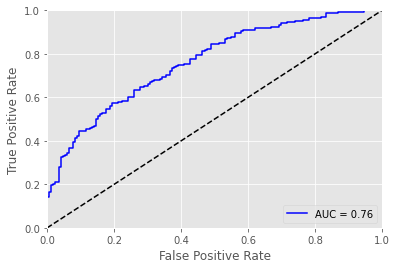

In [49]:
fpr, tpr, thresholds = roc_curve(test['team1_win'].values, test['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [50]:
roc_auc_score(test['team1_win'].values, test['prob'].values)

0.7633619584721867

# Add log5 & net_eff

In [51]:
train.head()

,team2_id,team2_score,team1_id,team1_score,WLoc,num_ot,team2_position,team1_position,team2_seed,team1_seed,...,team1_adjoe,team1_de,team1_adjde,game_id,exp_win2,exp_win1,team1_log5,seed_diff,team1_net_eff,team1_win
0,1429,53,1112,66,N,0,X14,X03,14,3,...,114.0151,97.7107,95.3458,2005-1112-1429,0.885899,0.886596,0.501729,-11,-5.3253,1
1,1163,77,1437,65,N,0,W07,W02,7,2,...,115.8448,96.7318,93.7249,2014-1437-1163,0.868820,0.919584,0.633239,-5,5.9136,0
2,1277,76,1400,85,N,0,X07,X01,7,1,...,118.7559,96.9119,96.4505,2003-1400-1277,0.861114,0.916251,0.638276,-6,8.3537,1
3,1257,69,1401,72,N,0,X06,X03,6,3,...,116.8243,89.4533,92.5218,2007-1401-1257,0.888784,0.935963,0.646509,-3,7.7127,1
4,1285,55,1276,74,N,0,X15,X02,15,2,...,115.7160,89.2552,86.0482,2019-1276-1285,0.595094,0.967912,0.953540,-13,-3.2660,1


In [52]:
logit = LogisticRegression()
logit.fit(train[['team1_log5','seed_diff','team1_net_eff']], train['team1_win'])

LogisticRegression()

In [53]:
smlogit = smf.logit("team1_win ~ team1_log5 + seed_diff + team1_net_eff", train).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.525201
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              team1_win   No. Observations:                  825
Model:                          Logit   Df Residuals:                      821
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.2419
Time:                        22:40:19   Log-Likelihood:                -433.29
converged:                       True   LL-Null:                       -571.58
Covariance Type:            nonrobust   LLR p-value:                 1.166e-59
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4449      0.433     -5.641      0.000      -3.294      -1.595
team1_log5        4.7322      0.850      5.566      0.000       3.066       6.399
seed_diff        -0.0391      0.025     -1.554      0.120      -0.088       0.010
team1_net_eff     0.0126      0.015      0.821      0.412      -0.017       0.043
=================================================================================
"""

In [54]:
test['prob'] = logit.predict_proba(test[['team1_log5', 'seed_diff','team1_net_eff']])[:,1]
test['prediction'] = logit.predict(test[['team1_log5','seed_diff','team1_net_eff']])

In [55]:
confusion_matrix(test['team1_win'], test['prediction'])

array([[120,  46],
       [ 59, 129]], dtype=int64)

In [56]:
accuracy_score(test['team1_win'], test['prediction'],)

0.7033898305084746

In [57]:
precision_score(test['team1_win'], test['prediction'])

0.7371428571428571

In [58]:
recall_score(test['team1_win'], test['prediction'])

0.6861702127659575

In [59]:
f1_score(test['team1_win'], test['prediction'])

0.7107438016528925

In [60]:
log_loss(test['team1_win'].values, test['prob'].values)

0.5729683670480156

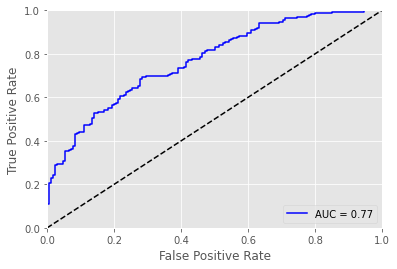

In [61]:
fpr, tpr, thresholds = roc_curve(test['team1_win'].values, test['prob'].values)
roc_auc = auc(fpr, tpr)
plot_roc(fpr, tpr, roc_auc)

In [62]:
roc_auc_score(test['team1_win'].values, test['prob'].values)

0.7700269161753397

# 相关组合探索：
第十次

In [63]:
logit = LogisticRegression()
RF = RandomForestClassifier()
class_SVC = SVC(probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
list1 = ['WLoc','game_id','team1_score','team2_score','host','slot','team1_coach_id','team1_position','team1_region','team1_teamname','team2_coach_id','team2_position','team2_region','team2_teamname']
train1 = train.drop(list1,axis = 1)
train1
# logit.fit(train.drop(), train['team1_win'])

,team2_id,team1_id,num_ot,team2_seed,team1_seed,strongseed,weakseed,season,host_lat,host_long,...,team1_oe,team1_adjoe,team1_de,team1_adjde,exp_win2,exp_win1,team1_log5,seed_diff,team1_net_eff,team1_win
0,1429,1112,0,14,3,3,14,2005,43.6167,-116.2000,...,111.7366,114.0151,97.7107,95.3458,0.885899,0.886596,0.501729,-11,-5.3253,1
1,1163,1437,0,7,2,2,7,2014,42.9047,-78.8494,...,114.1827,115.8448,96.7318,93.7249,0.868820,0.919584,0.633239,-5,5.9136,0
2,1277,1400,0,7,1,1,7,2003,29.4167,-98.5000,...,111.2154,118.7559,96.9119,96.4505,0.861114,0.916251,0.638276,-6,8.3537,1
3,1257,1401,0,6,3,3,6,2007,38.0297,-84.4947,...,114.7877,116.8243,89.4533,92.5218,0.888784,0.935963,0.646509,-3,7.7127,1
4,1285,1276,0,15,2,2,15,2019,41.6000,-93.6100,...,108.2360,115.7160,89.2552,86.0482,0.595094,0.967912,0.953540,-13,-3.2660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1323,1112,0,5,1,1,5,2003,33.8361,-117.8897,...,110.9747,114.4555,91.6550,90.2006,0.861791,0.939273,0.712689,-4,0.6996,1
821,1300,1295,0,16,16,16,16,2019,39.7594,-84.1917,...,108.1980,106.6750,110.0540,109.8730,0.208404,0.415885,0.730051,0,7.6960,1
822,1173,1393,0,7,10,7,10,2016,38.6272,-90.1978,...,106.8060,110.4020,99.7255,94.5622,0.824083,0.855822,0.558913,3,1.3610,1
823,1199,1281,0,9,8,8,9,2018,36.1667,-86.7833,...,113.3000,108.1000,97.8000,100.8000,0.734879,0.690843,0.446343,-1,-2.5000,0


In [64]:
list_independent = ['team2_id', 'team1_id', 'num_ot',
       'team2_seed', 'team1_seed', 'strongseed', 'weakseed', 'season',
       'host_lat', 'host_long', 'team2_lat', 'team2_long', 'team1_lat',
       'team1_long', 'team2_pt_school_ncaa', 'team2_pt_overall_ncaa',
       'team2_pt_school_s16', 'team2_pt_overall_s16', 'team2_pt_school_ff',
       'team2_pt_overall_ff', 'team2_pt_career_school_wins',
       'team2_pt_career_school_losses', 'team2_pt_career_overall_wins',
       'team2_pt_career_overall_losses', 'team2_pt_team_season_wins',
       'team2_pt_team_season_losses', 'team2_pt_coach_season_wins',
       'team2_pt_coach_season_losses', 'team1_pt_school_ncaa',
       'team1_pt_overall_ncaa', 'team1_pt_school_s16', 'team1_pt_overall_s16',
       'team1_pt_school_ff', 'team1_pt_overall_ff',
       'team1_pt_career_school_wins', 'team1_pt_career_school_losses',
       'team1_pt_career_overall_wins', 'team1_pt_career_overall_losses',
       'team1_pt_team_season_wins', 'team1_pt_team_season_losses',
       'team1_pt_coach_season_wins', 'team1_pt_coach_season_losses',
       'team2_fg2pct', 'team2_fg3pct', 'team2_ftpct', 'team2_blockpct',
       'team2_oppfg2pct', 'team2_oppfg3pct', 'team2_oppftpct',
       'team2_oppblockpct', 'team2_f3grate', 'team2_oppf3grate', 'team2_arate',
       'team2_opparate', 'team2_stlrate', 'team2_oppstlrate', 'team1_fg2pct',
       'team1_fg3pct', 'team1_ftpct', 'team1_blockpct', 'team1_oppfg2pct',
       'team1_oppfg3pct', 'team1_oppftpct', 'team1_oppblockpct',
       'team1_f3grate', 'team1_oppf3grate', 'team1_arate', 'team1_opparate',
       'team1_stlrate', 'team1_oppstlrate', 'team2_tempo', 'team2_adjtempo',
       'team2_oe', 'team2_adjoe', 'team2_de', 'team2_adjde', 'team1_tempo',
       'team1_adjtempo', 'team1_oe', 'team1_adjoe', 'team1_de', 'team1_adjde',
       'exp_win2', 'exp_win1', 'team1_log5', 'seed_diff', 'team1_net_eff']
list2 = ['team1_ap_final','team1_ap_preseason','team1_coaches_before_final','team1_coaches_preseason','team2_ap_final','team2_ap_preseason','team2_coaches_before_final','team2_coaches_preseason']
train2 = train1.drop(list2,axis = 1)
logit.fit(train2[list_independent], train2['team1_win'])
RF.fit(train2[list_independent],train2['team1_win'])
mlp.fit(train2[list_independent],train2['team1_win'])
class_SVC.fit(train2[list_independent],train2['team1_win'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

In [65]:
# smlogit = smf.logit("team1_win ~ exp_win1 + exp_win2", train).fit()
# smlogit.summary()

In [66]:
list1 = ['WLoc','game_id','team1_score','team2_score','host','slot','team1_coach_id','team1_position','team1_region','team1_teamname','team2_coach_id','team2_position','team2_region','team2_teamname']
test1 = test.drop(list1,axis = 1)
list2 = ['team1_ap_final','team1_ap_preseason','team1_coaches_before_final','team1_coaches_preseason','team2_ap_final','team2_ap_preseason','team2_coaches_before_final','team2_coaches_preseason']
test2 = test1.drop(list2,axis = 1)
test2['prob'] = logit.predict_proba(test2[list_independent])[:,1]
test2['prediction'] = logit.predict(test2[list_independent])
test3 = test1.drop(list2,axis = 1)
test3['prob'] = RF.predict_proba(test3[list_independent])[:,1]
test3['prediction'] = RF.predict(test3[list_independent])
test4 = test1.drop(list2,axis = 1)
test4['prob'] = mlp.predict_proba(test4[list_independent])[:,1]
test4['prediction'] = mlp.predict(test4[list_independent])
test5 = test1.drop(list2,axis = 1)
test5['prob'] = class_SVC.predict_proba(test5[list_independent])[:,1]
test5['prediction'] = class_SVC.predict(test5[list_independent])


In [67]:
test2.head()

,team2_id,team1_id,num_ot,team2_seed,team1_seed,strongseed,weakseed,season,host_lat,host_long,...,team1_de,team1_adjde,exp_win2,exp_win1,team1_log5,seed_diff,team1_net_eff,team1_win,prob,prediction
0,1284,1214,0,16,16,16,16,2006,39.7594,-84.1917,...,91.8503,100.4858,0.454518,0.259984,0.296584,0,-0.0165,0,0.474803,0
1,1458,1165,0,4,12,4,12,2010,30.3369,-81.6614,...,97.4265,102.0349,0.922786,0.782531,0.231415,8,1.9335,1,0.138894,0
2,1257,1276,0,1,4,1,4,2013,33.7550,-84.3900,...,97.5973,96.4650,0.966287,0.910654,0.262321,3,6.9802,0,0.229262,0
3,1140,1233,0,14,14,14,14,2012,39.7594,-84.1917,...,100.6866,103.1821,0.759556,0.763610,0.505581,0,7.6580,0,0.468880,0
4,1195,1196,0,15,3,3,15,2013,32.7050,-97.1228,...,85.6828,87.1551,0.574504,0.956122,0.941652,-12,10.8646,1,0.925525,1


In [68]:
# Logistic Regression
print(confusion_matrix(test2['team1_win'], test2['prediction']))
print(accuracy_score(test2['team1_win'], test2['prediction'],))
print(precision_score(test2['team1_win'], test2['prediction']))
print(recall_score(test2['team1_win'], test2['prediction']))
print(f1_score(test2['team1_win'], test2['prediction']))
print(log_loss(test2['team1_win'].values, test2['prob'].values))
print(roc_auc_score(test2['team1_win'].values, test2['prob'].values))


[[123  43]
 [ 64 124]]
0.6977401129943502
0.7425149700598802
0.6595744680851063
0.6985915492957746
0.5930739716707814
0.7562163547808254


In [69]:
# Random FOrest
print(confusion_matrix(test3['team1_win'], test3['prediction']))
print(accuracy_score(test3['team1_win'], test3['prediction'],))
print(precision_score(test3['team1_win'], test3['prediction']))
print(recall_score(test3['team1_win'], test3['prediction']))
print(f1_score(test3['team1_win'], test3['prediction']))
print(log_loss(test3['team1_win'].values, test3['prob'].values))
print(roc_auc_score(test3['team1_win'].values, test3['prob'].values))

[[122  44]
 [ 60 128]]
0.7062146892655368
0.7441860465116279
0.6808510638297872
0.711111111111111
0.5859017253230149
0.7624166880287105


In [70]:
# Neural Network
print(confusion_matrix(test4['team1_win'], test4['prediction']))
print(accuracy_score(test4['team1_win'], test4['prediction'],))
print(precision_score(test4['team1_win'], test4['prediction']))
print(recall_score(test4['team1_win'], test4['prediction']))
print(f1_score(test4['team1_win'], test4['prediction']))
print(log_loss(test4['team1_win'].values, test4['prob'].values))
print(roc_auc_score(test4['team1_win'].values, test4['prob'].values))

[[111  55]
 [ 77 111]]
0.6271186440677966
0.6686746987951807
0.5904255319148937
0.6271186440677967
0.7044591324969758
0.6947257113560626


In [71]:
# SVM
print(confusion_matrix(test5['team1_win'], test5['prediction']))
print(accuracy_score(test5['team1_win'], test5['prediction'],))
print(precision_score(test5['team1_win'], test5['prediction']))
print(recall_score(test5['team1_win'], test5['prediction']))
print(f1_score(test5['team1_win'], test5['prediction']))
print(log_loss(test5['team1_win'].values, test5['prob'].values))
print(roc_auc_score(test5['team1_win'].values, test5['prob'].values))

[[128  38]
 [ 98  90]]
0.615819209039548
0.703125
0.4787234042553192
0.5696202531645569
0.6435961316879412
0.6834785952319917


In [72]:
# fpr, tpr, thresholds = roc_curve(test2['team1_win'].values, test2['prob'].values)
# roc_auc = auc(fpr, tpr)
# plot_roc(fpr, tpr, roc_auc)
# fpr, tpr, thresholds = roc_curve(test3['team1_win'].values, test3['prob'].values)
# roc_auc = auc(fpr, tpr)
# plot_roc(fpr, tpr, roc_auc)
# fpr, tpr, thresholds = roc_curve(test4['team1_win'].values, test4['prob'].values)
# roc_auc = auc(fpr, tpr)
# plot_roc(fpr, tpr, roc_auc)
# fpr, tpr, thresholds = roc_curve(test5['team1_win'].values, test5['prob'].values)
# roc_auc = auc(fpr, tpr)
# plot_roc(fpr, tpr, roc_auc)

全numeric数据（再去除八个coach数据）效果：LR = RF 》 SVM 〉NN

# Feature Importance

In [73]:
importances = RF.feature_importances_

print('Feature import ranking by Random Forest Model!')
indices = np.argsort(importances)[::-1]

for ind in range(train2[list_independent].shape[1]):
  print('{0}:{1}'.format( train2[list_independent].columns[indices[ind]], round(importances[indices[ind],], 4)))


Feature import ranking by Random Forest Model!
team1_log5:0.0581
exp_win1:0.0411
exp_win2:0.0359
seed_diff:0.0303
team2_seed:0.0296
team1_seed:0.0246
team1_net_eff:0.0221
team2_adjoe:0.0188
team1_adjde:0.0181
team2_adjde:0.0156
team1_adjoe:0.0156
team1_de:0.0152
team2_pt_team_season_wins:0.0144
team1_oe:0.0135
team1_stlrate:0.0133
team2_oe:0.0132
team2_de:0.0131
team1_oppfg3pct:0.0131
team1_oppstlrate:0.013
team1_pt_career_overall_wins:0.0127
team2_pt_career_overall_wins:0.0123
team2_oppstlrate:0.0123
team1_tempo:0.0117
team1_arate:0.0115
team2_pt_career_school_losses:0.011
team1_lat:0.011
team2_pt_career_overall_losses:0.0108
team2_oppfg2pct:0.0108
team1_blockpct:0.0107
team1_oppf3grate:0.0107
team1_pt_career_overall_losses:0.0106
team1_ftpct:0.0105
team1_pt_team_season_wins:0.0104
team2_adjtempo:0.0104
team1_pt_overall_ncaa:0.0102
team1_f3grate:0.0101
team1_pt_career_school_losses:0.0099
team1_adjtempo:0.0099
team2_oppfg3pct:0.0099
team2_oppblockpct:0.0099
team2_opparate:0.0097
team2

# 2022 predict

In [74]:
mm_data = pd.read_csv('NCAA_Tourney_2002_2021.csv')
real_data = pd.read_csv('NCAA_Tourney_2022.csv')

In [75]:
pre_2022 = real_data

In [76]:
mm_data['exp_win1'] = (mm_data['team1_adjoe']**11.5)/ ((mm_data['team1_adjde']**11.5)+(mm_data['team1_adjoe']**11.5))
mm_data['exp_win2'] = (mm_data['team2_adjoe']**11.5)/ ((mm_data['team2_adjde']**11.5)+(mm_data['team2_adjoe']**11.5))
mm_data['team1_log5'] = (mm_data['exp_win1'] - (mm_data['exp_win1']*mm_data['exp_win2']))/ (mm_data['exp_win1']+mm_data['exp_win2']-(2*mm_data['exp_win1']*mm_data['exp_win2']))
mm_data['seed_diff'] = mm_data['team1_seed'] - mm_data['team2_seed']
mm_data['team1_net_eff'] = mm_data['team1_oe'] - mm_data['team2_oe']
mm_data.dropna(subset=['team1_log5'], inplace=True)

pre_2022['exp_win1'] = (pre_2022['team1_adjoe']**11.5)/ ((pre_2022['team1_adjde']**11.5)+(pre_2022['team1_adjoe']**11.5))
pre_2022['exp_win2'] = (pre_2022['team2_adjoe']**11.5)/ ((pre_2022['team2_adjde']**11.5)+(pre_2022['team2_adjoe']**11.5))
pre_2022['team1_log5'] = (pre_2022['exp_win1'] - (pre_2022['exp_win1']*pre_2022['exp_win2']))/ (pre_2022['exp_win1']+pre_2022['exp_win2']-(2*pre_2022['exp_win1']*pre_2022['exp_win2']))
pre_2022['seed_diff'] = pre_2022['team1_seed'] - pre_2022['team2_seed']
pre_2022['team1_net_eff'] = pre_2022['team1_oe'] - pre_2022['team2_oe']
pre_2022.dropna(subset=['team1_log5'], inplace=True)

In [77]:
mm_data['team1_win'] = (mm_data['team1_score']>mm_data['team2_score']).astype(int)

In [78]:
# Modified
mm_data_1_all = mm_data.sample(frac=.5, random_state=4)
mm_data_2_all = mm_data[~mm_data.index.isin(mm_data_1_all.index)].reset_index(drop=True)
mm_data_1_all = mm_data_1_all.reset_index(drop=True)
mm_data_2_all[1:100]

,team1_id,team1_score,team2_id,team2_score,WLoc,num_ot,team1_position,team2_position,team1_seed,team2_seed,...,team2_adjoe,team2_de,team2_adjde,game_id,exp_win1,exp_win2,team1_log5,seed_diff,team1_net_eff,team1_win
1,1211,83,1166,65,N,0,X01,X05,1,5,...,115.5670,97.5105,92.8330,2021-1211-1166,0.983748,0.925467,0.829783,-4,12.7520,1
2,1211,87,1328,71,N,0,X01,X08,1,8,...,112.1240,98.5625,94.0513,2021-1211-1328,0.983748,0.883015,0.889127,-7,16.2860,1
3,1332,95,1234,80,N,0,X07,X02,7,2,...,124.1920,101.0740,93.8602,2021-1332-1234,0.889608,0.961589,0.243513,5,-7.6410,1
4,1166,72,1325,58,N,0,X05,X13,5,13,...,113.6980,102.5590,101.1560,2021-1166-1325,0.925467,0.793170,0.764032,-8,-2.5830,1
5,1211,98,1313,55,N,0,X01,X16b,1,16,...,101.3090,97.4792,103.6230,2021-1211-1313,0.983748,0.435433,0.987418,-15,18.3840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1268,87,1458,57,N,0,W01,W08,1,8,...,107.4935,100.3758,95.4425,2002-1268-1458,0.939819,0.796964,0.799135,-7,10.1383,1
96,1417,105,1153,101,N,2,Z08,Z01,8,1,...,115.7842,86.3924,88.0357,2002-1417-1153,0.824566,0.958942,0.167529,7,-6.0301,1
97,1231,74,1181,73,N,0,Y05,Y01,5,1,...,118.5999,90.2544,87.7504,2002-1231-1181,0.906968,0.969660,0.233739,4,-10.9752,1
98,1281,82,1417,73,N,0,Z12,Z08,12,8,...,110.6811,102.9371,96.7451,2002-1281-1417,0.808674,0.824566,0.473481,4,6.4720,1


In [79]:
# Modified
mm_data_2_all['team1_win'] = 0
mm_data_2_all['team1_log5'] = 1-mm_data_2_all['team1_log5']
mm_data_2_all['game_id'] = (mm_data_2_all['game_id'].str.split('-', expand=True)[0] 
                           + '-' + mm_data_2_all['game_id'].str.split('-', expand=True)[2] 
                           + '-' + mm_data_2_all['game_id'].str.split('-', expand=True)[1]
                           ) 
mm_data_2_all['seed_diff'] = mm_data_2_all['seed_diff']*-1
mm_data_2_all['team1_net_eff'] = mm_data_2_all['team1_net_eff']*-1
mm_data_2_all.columns = ['team2_id', 'team2_score', 'team1_id', 'team1_score', 'WLoc',
       'num_ot', 'team2_position', 'team1_position', 'team2_seed',
       'team1_seed', 'strongseed', 'weakseed', 'team2_region',
       'team1_region', 'slot', 'team2_teamname', 'team1_teamname',
       'season', 'host', 'host_lat', 'host_long', 'team2_lat',
       'team2_long', 'team1_lat', 'team1_long', 'team2_coach_id',
       'team2_pt_school_ncaa', 'team2_pt_overall_ncaa',
       'team2_pt_school_s16', 'team2_pt_overall_s16',
       'team2_pt_school_ff', 'team2_pt_overall_ff',
       'team2_pt_career_school_wins', 'team2_pt_career_school_losses',
       'team2_pt_career_overall_wins', 'team2_pt_career_overall_losses',
       'team2_pt_team_season_wins', 'team2_pt_team_season_losses',
       'team2_pt_coach_season_wins', 'team2_pt_coach_season_losses',
       'team1_coach_id', 'team1_pt_school_ncaa', 'team1_pt_overall_ncaa',
       'team1_pt_school_s16', 'team1_pt_overall_s16',
       'team1_pt_school_ff', 'team1_pt_overall_ff',
       'team1_pt_career_school_wins', 'team1_pt_career_school_losses',
       'team1_pt_career_overall_wins', 'team1_pt_career_overall_losses',
       'team1_pt_team_season_wins', 'team1_pt_team_season_losses',
       'team1_pt_coach_season_wins', 'team1_pt_coach_season_losses',
       'team2_ap_final', 'team2_ap_preseason',
       'team2_coaches_before_final', 'team2_coaches_preseason',
       'team1_ap_final', 'team1_ap_preseason',
       'team1_coaches_before_final', 'team1_coaches_preseason',
       'team2_fg2pct', 'team2_fg3pct', 'team2_ftpct', 'team2_blockpct',
       'team2_oppfg2pct', 'team2_oppfg3pct', 'team2_oppftpct',
       'team2_oppblockpct', 'team2_f3grate', 'team2_oppf3grate',
       'team2_arate', 'team2_opparate', 'team2_stlrate',
       'team2_oppstlrate', 'team1_fg2pct', 'team1_fg3pct', 'team1_ftpct',
       'team1_blockpct', 'team1_oppfg2pct', 'team1_oppfg3pct',
       'team1_oppftpct', 'team1_oppblockpct', 'team1_f3grate',
       'team1_oppf3grate', 'team1_arate', 'team1_opparate',
       'team1_stlrate', 'team1_oppstlrate', 'team2_tempo',
       'team2_adjtempo', 'team2_oe', 'team2_adjoe', 'team2_de',
       'team2_adjde', 'team1_tempo', 'team1_adjtempo', 'team1_oe',
       'team1_adjoe', 'team1_de', 'team1_adjde', 'game_id', 'exp_win2',
       'exp_win1', 'team1_log5', 'seed_diff','team1_net_eff', 'team1_win']

In [80]:
mm_train_all = pd.concat([mm_data_2_all, mm_data_1_all]).reset_index(drop=True)

In [81]:
mm_train_all.to_csv('New_2022_training_data.csv', index = False)

In [82]:
logit = LogisticRegression()
RF = RandomForestClassifier()
class_SVC = SVC(probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
# list1 = ['WLoc','game_id','team1_score','team2_score','host','slot','team1_coach_id','team1_position','team1_region','team1_teamname','team2_coach_id','team2_position','team2_region','team2_teamname']
# train1 = train.drop(list1,axis = 1)

list_independent = ['team2_id', 'team1_id',
       'team2_seed', 'team1_seed', 'strongseed', 'weakseed', 'season',
       'host_lat', 'host_long', 'team2_lat', 'team2_long', 'team1_lat',
       'team1_long', 'team2_pt_school_ncaa', 'team2_pt_overall_ncaa',
       'team2_pt_school_s16', 'team2_pt_overall_s16', 'team2_pt_school_ff',
       'team2_pt_overall_ff', 'team2_pt_career_school_wins',
       'team2_pt_career_school_losses', 'team2_pt_career_overall_wins',
       'team2_pt_career_overall_losses', 'team2_pt_team_season_wins',
       'team2_pt_team_season_losses', 'team2_pt_coach_season_wins',
       'team2_pt_coach_season_losses', 'team1_pt_school_ncaa',
       'team1_pt_overall_ncaa', 'team1_pt_school_s16', 'team1_pt_overall_s16',
       'team1_pt_school_ff', 'team1_pt_overall_ff',
       'team1_pt_career_school_wins', 'team1_pt_career_school_losses',
       'team1_pt_career_overall_wins', 'team1_pt_career_overall_losses',
       'team1_pt_team_season_wins', 'team1_pt_team_season_losses',
       'team1_pt_coach_season_wins', 'team1_pt_coach_season_losses',
       'team2_fg2pct', 'team2_fg3pct', 'team2_ftpct', 'team2_blockpct',
       'team2_oppfg2pct', 'team2_oppfg3pct', 'team2_oppftpct',
       'team2_oppblockpct', 'team2_f3grate', 'team2_oppf3grate', 'team2_arate',
       'team2_opparate', 'team2_stlrate', 'team2_oppstlrate', 'team1_fg2pct',
       'team1_fg3pct', 'team1_ftpct', 'team1_blockpct', 'team1_oppfg2pct',
       'team1_oppfg3pct', 'team1_oppftpct', 'team1_oppblockpct',
       'team1_f3grate', 'team1_oppf3grate', 'team1_arate', 'team1_opparate',
       'team1_stlrate', 'team1_oppstlrate', 'team2_tempo', 'team2_adjtempo',
       'team2_oe', 'team2_adjoe', 'team2_de', 'team2_adjde', 'team1_tempo',
       'team1_adjtempo', 'team1_oe', 'team1_adjoe', 'team1_de', 'team1_adjde',
       'exp_win2', 'exp_win1', 'team1_log5', 'seed_diff', 'team1_net_eff']
# list2 = ['team1_ap_final','team1_ap_preseason','team1_coaches_before_final','team1_coaches_preseason','team2_ap_final','team2_ap_preseason','team2_coaches_before_final','team2_coaches_preseason']
# train2 = train1.drop(list2,axis = 1)
logit.fit(mm_train_all[list_independent], mm_train_all['team1_win'])
RF.fit(mm_train_all[list_independent],mm_train_all['team1_win'])
mlp.fit(mm_train_all[list_independent],mm_train_all['team1_win'])
class_SVC.fit(mm_train_all[list_independent],mm_train_all['team1_win'])

# list1 = ['WLoc','game_id','team1_score','team2_score','host','slot','team1_coach_id','team1_position','team1_region','team1_teamname','team2_coach_id','team2_position','team2_region','team2_teamname']
# test1 = test.drop(list1,axis = 1)
# list2 = ['team1_ap_final','team1_ap_preseason','team1_coaches_before_final','team1_coaches_preseason','team2_ap_final','team2_ap_preseason','team2_coaches_before_final','team2_coaches_preseason']
# test2 = test1.drop(list2,axis = 1)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

In [83]:
# pre_2022['prob'] = logit.predict_proba(pre_2022[list_independent])[:,1]
# pre_2022['prediction'] = logit.predict(pre_2022[list_independent])
# pre_2022 = test1.drop(list2,axis = 1)

# pre_2022['prob'] = RF.predict_proba(pre_2022[list_independent])[:,1]
# pre_2022['prediction'] = RF.predict(pre_2022[list_independent])
# # test4 = test1.drop(list2,axis = 1)

# pre_2022['prob'] = mlp.predict_proba(pre_2022[list_independent])[:,1]
# pre_2022['prediction'] = mlp.predict(pre_2022[list_independent])
# # test5 = test1.drop(list2,axis = 1)

pre_2022['prob'] = class_SVC.predict_proba(pre_2022[list_independent])[:,1]
pre_2022['prediction'] = class_SVC.predict(pre_2022[list_independent])

In [84]:
print(pre_2022[['prob','prediction']].head())

       prob  prediction
0  0.384688           0
1  0.533321           1
2  0.530219           1
3  0.500000           0
4  0.608934           1


In [85]:
a = set(mm_data.columns)
b = set(pre_2022.columns)
a-b

{'WLoc',
 'num_ot',
 'team1_coaches_before_final',
 'team1_score',
 'team1_win',
 'team2_coaches_before_final',
 'team2_score'}

In [86]:
pre_2022[['game_id','prob']].to_csv("pre_2022.csv", index=False)

# Create Example Submission
没用

In [87]:
example_submission = pd.read_csv('NCAA_Tourney_2002_2021.csv').query("season==2019").reset_index(drop=True)

In [88]:
example_submission['seed_diff'] = example_submission['team1_seed'] - example_submission['team2_seed']

In [89]:
example_submission['prob'] = seed_smlogit.predict(example_submission['seed_diff'])

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'team1_log5' is not defined
    team1_win ~ team1_log5
                ^^^^^^^^^^

In [ ]:
example_submission[['game_id','prob']].head()

In [ ]:
example_submission[['game_id','prob']].shape

In [ ]:
example_submission[['game_id','prob']].to_csv("trp_example_submission.csv", index=False)